In [53]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
df1 = pd.read_parquet('./data/fhv_tripdata_2021-01.parquet')

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[ns]
 2   dropOff_datetime        1154112 non-null  datetime64[ns]
 3   PUlocationID            195845 non-null   float64       
 4   DOlocationID            991892 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1153227 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 61.6+ MB


In [19]:
df1['duration'] = df1['dropOff_datetime'] - df1['pickup_datetime']
df1['duration'] = df1['duration'].apply(lambda td: td.total_seconds()/60)

In [20]:
df1

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285,19.433333


In [21]:
df1['duration'].mean()

19.167224093791006

<AxesSubplot:>

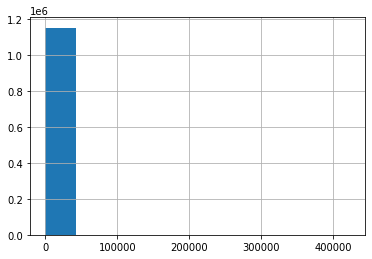

In [22]:
df1['duration'].hist()

/home/fklein/.zindi-venv/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

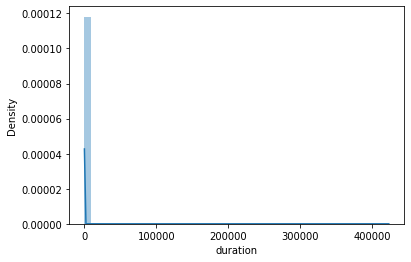

In [23]:
sns.distplot(df1['duration'])

In [24]:
df1.describe()

,PUlocationID,DOlocationID,duration
count,195845.000000,991892.000000,1.154112e+06
mean,139.859690,135.898030,1.916722e+01
std,74.991382,80.474902,3.986922e+02
min,1.000000,1.000000,1.666667e-02
25%,75.000000,67.000000,7.766667e+00
50%,143.000000,132.000000,1.340000e+01
75%,206.000000,213.000000,2.228333e+01
max,265.000000,265.000000,4.233710e+05


In [25]:
df1 = df1[(df1.duration > 1) & (df1.duration < 60)]

In [26]:
df1.describe()

,PUlocationID,DOlocationID,duration
count,181184.000000,960145.000000,1.106890e+06
mean,139.903706,135.688381,1.616430e+01
std,74.767401,80.358241,1.138640e+01
min,1.000000,1.000000,1.016667e+00
25%,75.000000,67.000000,7.850000e+00
50%,146.000000,132.000000,1.321667e+01
75%,206.000000,213.000000,2.138333e+01
max,265.000000,265.000000,5.998333e+01


In [29]:
df1.fillna(-1, inplace=True)
df1

/tmp/ipykernel_306412/935648008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.fillna(-1, inplace=True)


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1.0,-1.0,-1,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1.0,-1.0,-1,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1.0,72.0,-1,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,-1.0,61.0,-1,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,-1.0,71.0,-1,B00037,9.050000
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,-1,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,-1,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,-1,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,-1,B03285,19.433333


In [34]:
((df1.PUlocationID==-1) | (df1.PUlocationID==-1)).mean()

0.8363125513827029

In [35]:
categorical = ['PUlocationID', 'DOlocationID']
df1[categorical] = df1[categorical].astype(str)

/tmp/ipykernel_306412/3318167646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[categorical] = df1[categorical].astype(str)


In [45]:
train_dicts = df1[categorical].to_dict(orient='records')
#train_dicts

In [48]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [51]:
X_train.shape

(1106890, 525)

In [69]:
target = ['duration']
y_train = df1[target].values

In [70]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_train)

mean_squared_error(y_train, y_pred1, squared=False)

10.387902998754326

In [74]:
df2 = pd.read_parquet('./data/fhv_tripdata_2021-02.parquet')
df2['duration'] = df2['dropOff_datetime'] - df2['pickup_datetime']
df2['duration'] = df2['duration'].apply(lambda td: td.total_seconds()/60)
df2 = df2[(df2.duration > 1) & (df2.duration < 60)]
df2.fillna(-1, inplace=True)
df2[categorical] = df2[categorical].astype(str)
val_dicts = df2[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val = df2[target].values

In [76]:
y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

10.897042716994392

In [73]:
df2

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00013,2021-02-01 00:01:00,2021-02-01 01:33:00,-1.0,-1.0,-1,B00014,92.000000
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,-1,B00021,10.666667
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,-1,B00021,14.566667
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,-1,B00021,7.950000
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,-1.0,225.0,-1,B00037,13.800000
...,...,...,...,...,...,...,...,...
1037687,B03282,2021-02-28 23:01:16,2021-02-28 23:14:48,-1.0,31.0,-1,B01717,13.533333
1037688,B03282,2021-02-28 23:36:10,2021-02-28 23:47:38,-1.0,169.0,-1,B01717,11.466667
1037689,B03285,2021-02-28 23:18:36,2021-02-28 23:43:59,28.0,171.0,-1,B03285,25.383333
1037690,B03285,2021-02-28 23:26:34,2021-02-28 23:44:37,16.0,252.0,-1,B03285,18.050000


In [68]:
y_pred

array([[22.85231936],
       [14.19493489],
       [13.39729704],
       ...,
       [15.80318194],
       [16.58611321],
       [19.03982997]])